In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

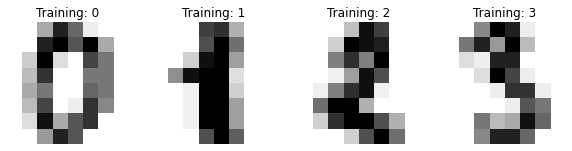

In [2]:
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [13]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.25, shuffle=False)
normalize = np.vectorize(lambda x: x/16-0.5)
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)
np.savez('test_set', x=X_test_norm, y=y_test)
print(y_test[0])
X_test_norm[0]
        

3


array([-0.5   , -0.5   , -0.0625,  0.5   ,  0.5   ,  0.375 , -0.5   ,
       -0.5   , -0.5   , -0.5   ,  0.5   ,  0.25  ,  0.125 ,  0.4375,
       -0.4375, -0.5   , -0.5   , -0.5   ,  0.125 , -0.25  ,  0.5   ,
        0.125 , -0.5   , -0.5   , -0.5   , -0.5   , -0.5   ,  0.0625,
        0.5   ,  0.1875, -0.4375, -0.5   , -0.5   , -0.5   , -0.5   ,
       -0.5   , -0.0625,  0.5   ,  0.    , -0.5   , -0.5   , -0.5   ,
       -0.5   , -0.5   , -0.5   ,  0.5   , -0.0625, -0.5   , -0.5   ,
       -0.5   ,  0.    , -0.25  ,  0.125 ,  0.4375, -0.375 , -0.5   ,
       -0.5   , -0.5   ,  0.25  ,  0.5   ,  0.5   , -0.125 , -0.5   ,
       -0.5   ])

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf

max_norm = tf.keras.constraints.MaxNorm(max_value=2, axis=0)

model = Sequential([
  Dense(40, activation='relu', kernel_constraint=max_norm, input_shape=(64,)),
  Dense(20, activation='relu', kernel_constraint=max_norm),
  Dense(10, activation='relu', kernel_constraint=max_norm),
])

model.compile(
  optimizer='adam',
  loss=SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 3,630
Trainable params: 3,630
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(
  X_train_norm, # training data
  y_train, # training targets
  epochs=32,
  batch_size=32,
)

Train on 1347 samples
Epoch 1/32
1347/1347 [==============================] - 1s 401us/sample - loss: 2.1921 - accuracy: 0.2220
Epoch 2/32
1347/1347 [==============================] - 0s 30us/sample - loss: 1.9727 - accuracy: 0.3905
Epoch 3/32
1347/1347 [==============================] - 0s 29us/sample - loss: 1.6349 - accuracy: 0.5902
Epoch 4/32
1347/1347 [==============================] - 0s 27us/sample - loss: 1.3194 - accuracy: 0.6236
Epoch 5/32
1347/1347 [==============================] - 0s 28us/sample - loss: 1.1292 - accuracy: 0.6392
Epoch 6/32
1347/1347 [==============================] - 0s 29us/sample - loss: 1.0154 - accuracy: 0.6659
Epoch 7/32
1347/1347 [==============================] - 0s 27us/sample - loss: 0.9422 - accuracy: 0.6897
Epoch 8/32
1347/1347 [==============================] - 0s 29us/sample - loss: 0.8975 - accuracy: 0.7030
Epoch 9/32
1347/1347 [==============================] - 0s 32us/sample - loss: 0.8652 - accuracy: 0.7268
Epoch 10/32
1347/1347 [=========

In [6]:
y_predicted = model.predict(X_test_norm)
y_predicted_train = model.predict(X_train_norm)
test_samples = y_test.shape[0]
y_predicted_classes = [np.argmax(y) for y in y_predicted]
correct_prediction = 0
for i, prediction in enumerate(y_predicted_classes):
    if prediction == y_test[i]:
        correct_prediction += 1

print(y_predicted[0])
print("Accuracy: " + str(100*correct_prediction/test_samples))
print(y_predicted_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Accuracy: 74.66666666666667
[9.019532 0.       0.       0.       0.       0.       0.       0.
 0.       0.      ]


In [7]:
weights_layer_1 = model.layers[0].weights[0]
print(model.layers[2].weights[1].numpy().shape)
# for weights in model.layers[0].weights[0].numpy():
#     print(weights)
# biases_layer_1 = model.layers[0].weights[1]
weights_layer_1

(10,)


<tf.Variable 'dense/kernel:0' shape=(64, 40) dtype=float32, numpy=
array([[-0.21805263,  0.00509192, -0.19996835, ..., -0.11773328,
         0.20862715,  0.11785208],
       [ 0.1654403 ,  0.0238907 ,  0.0656383 , ...,  0.02616258,
        -0.12992874, -0.17296304],
       [ 0.47280708, -0.09551614, -0.27218607, ..., -0.00399651,
        -0.04587622, -0.12085088],
       ...,
       [-0.12898229,  0.11893431, -0.01224576, ...,  0.071558  ,
         0.29343498, -0.5950289 ],
       [-0.262586  ,  0.27447176,  0.27483368, ...,  0.08293522,
        -0.08032133, -0.15261543],
       [ 0.14260419,  0.29733694,  0.0592805 , ...,  0.09281553,
        -0.27313623, -0.3347503 ]], dtype=float32)>

In [8]:
# tf.keras.backend.set_learning_phase(0) # use inference model format\n"
model.save('nmist_model.h5', save_format='h5')

In [ ]:
Sending packet bytes: [4, 64, 0]
Output value 0 is 0
Sending packet bytes: [4, 68, 0]
Output value 1 is 0
Sending packet bytes: [4, 72, 0]
Output value 2 is 0.22873273
Sending packet bytes: [4, 76, 0]
Output value 3 is 0.20918593
Sending packet bytes: [4, 80, 0]
Output value 4 is 0.23884948
Sending packet bytes: [4, 84, 0]
Output value 5 is 0.15829709
Sending packet bytes: [4, 88, 0]
Output value 6 is 0
Sending packet bytes: [4, 92, 0]
Output value 7 is 0.33656824
Sending packet bytes: [4, 96, 0]
Output value 8 is 0
Sending packet bytes: [4, 100, 0]
Output value 9 is 0
Sending packet bytes: [1, 128, 0]
cmd final state is 128
Dropping FPGA serial port session!